# Lab 06 - Cost Functions

Submitted By: Julian Singkham  
Date: OCT 25 2021

# Abstract

The purpose of this lab is to familiarize ourselves with using error and cost functions and learning how they work. Additionally, we also explored how parameters affect the accuracy of the model, and how the error function can be used to find the optimal parameter values. 

* The first part of the lab involved converting the models made in lab 2 into the cost function api. 
* The second part of the lab involved using a grid search to plot a heat map of the error associated with parameter values to visually inspect optimal values. 
* The thid part of the lab involved using the argmin numpy function to find the exact parameter values to produce the lowest error.
* The last part of the lab involved using the multivariate linear model to find the optimal weights for the advertising model.

Overall this lab wasn't too difficult as our prior experience with using grid searches and heatmaps made me less prone to error. 

The data utilized in this lab is gaussdist and advertising from an unknown author.

# Questions
1. By looking at the provided cost_functions.py, use 1-2 sentences to describe in detail the purpose of each of the methods. To guide this description, discuss the method input, method output, and what function each method serves for the cost function.

init: Creates the cost function object and saves the features and classifications locally.  
predict: Is the model itself and outputs predictions based on feature values and parameter values.  
mse: Outputs the mean squared error between the true classifications and predicted classifications.  
cost: This method uses the passes features and parameters to predict to create a model and then sends the model's predicitons to mse to calculate the model's error. It then outputs the error of the model.

2. For the heatmaps that you generated for this lab, what do they describe? What do the “valleys” and “peaks” of this heat map represent?

The heatmaps represent the change in error as the parameters change. Peaks and valleys mean that the model is particularly sensitive to the feature. In the first heatmap, there is a valley at 0-32 Mu, a peak at 32-48 Mu, a valley at 48-60, a peak at 60-68, and a valley at 68-100. Sigma has no such peaks and valleys, and there exists a gradual change in the error of the valley's as sigma increases. This means that sigma has little affect in comparison to mu in terms of error.

3. For experiment 2, you increased the number of samples within the specified range.   
   a. Describe how the heatmap representation changed due to this increase in sampling. 
   
Having a higher definition sample size resulted in a higher definition scale. Since the scale of the data shrunk, the heatmap showed more fidelity as the bleeding effect decreased. The bleeding effect is where outliers and small changes are overshadowed by the surrounding area.

    b. What benefit did this higher sampling rate have for finding the set of parameters 
    with the minimum error?  
   
The higher definition data made isolating low error parameter values much easier as the error scale decreased from ~0.01-0.11 to ~0.00025-0.00275. 
   
    c. Was this sampling rate high enough? Defend your answer!  
   
The sampling rate is high enough in my opinion as the lowest measureable error shown is ~0.00025 which is more than enough in almost all applications I can think of. Having higher definition data could lead to better parameter values, but at that point you are going from 0.025% error to 0.0025%. Although it is 10x better, in the grand scheme of things that benefit is marginal and most likely unnoticable.

4. The Gaussian distribution model is limited to two dimensions while the multivariate linear model implemented for this lab is 4 dimensional.  
   a. Describe a limitation of the grid search method as you add additional dimensions. Hint: Think about the time complexity required for the grid search as you add additional dimensions. 
   
Additional dimensions would lead to enormous increases in compute time as the grid search method has a time complexity of O(n^d) where n is the number of samples and d is the number of dimensions.
   
    b. With time complexity in mind, can you derive a rule (mathematical expression) 
    to estimate how many grid points are needed to evaluate all combination of 
    parameters based on the number of dimensions.  
    
See problem 4A. There would be n^d number of grid points.
    
    c. With this rule, compare 2-dimensional models with 4-dimensional models. 
    10- dimensional? 100-dimensional?  
   
Given the same number of samples per dimension, the 2-D model (400) has 2 powers less grid points when compared to the 4-D model (160,000). For n-dimensions the 2-D model is n-2 powers smaller than the n-D model. 

5. In experiment 3 you plotted the line of identity in the figure that compared the given response variable to the model prediction.  
   a. What does this line represent and how is it useful?  
   
The line represents how well the model fits to the data. The line representation helps with visualizing how well the model fits the data.
   
    b. What does it mean for a value to lie above the line? Below the line?  

Below the line means the model is high-balling the model, meaning that the predicition value is greater than the true value.   Above the line means the model is low-balling the model, meaning that the prediciiton value is less than the true value.

    c. How would predictions that perfectly replicate the given data appear in this plot?  

With an error of zero, the predictions vs true values would form a slope of 1.

6. What are the weaknesses of grid search? Why wouldn't we want to use it?

Grid search is computationally expensive, especially if the data has a wide range of values and/or multiple features. The number of features is the primary concern as that exponentially increases compute time.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from cost_functions import GaussianCostFunction
from cost_functions import LinearCostFunction

### Experiment 1: Coarse Grid Search - Gaussian Distribution
#### Notebook Setup

Text(0, 0.5, 'Response')

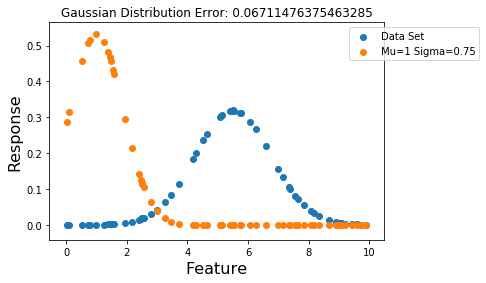

In [2]:
# Load the gaussdist.csv
np_feature = np.loadtxt(open('gaussdist.csv', "rb"), delimiter=",", usecols=range(0,1))
np_response = np.loadtxt(open('gaussdist.csv', "rb"), delimiter=",", usecols=range(1,2))

# Predict values
gauss = GaussianCostFunction(np_feature, np_response)
np_params = np.array([1, 0.75])
np_pred = gauss.predict(np_feature, np_params)

# Calculate model error
error_p = gauss.cost(np_params)

# Plot the gaussdist data
plt.title("Gaussian Distribution Error: " + str(error_p))
plt.scatter(np_feature, np_response, label="Data Set")
plt.scatter(np_feature, np_pred, label="Mu=1 Sigma=0.75")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.xlabel("Feature", fontsize=16)
plt.ylabel("Response", fontsize=16)

#### Grid Search - Coarse

Text(69.0, 0.5, 'Mean Index (Mu)')

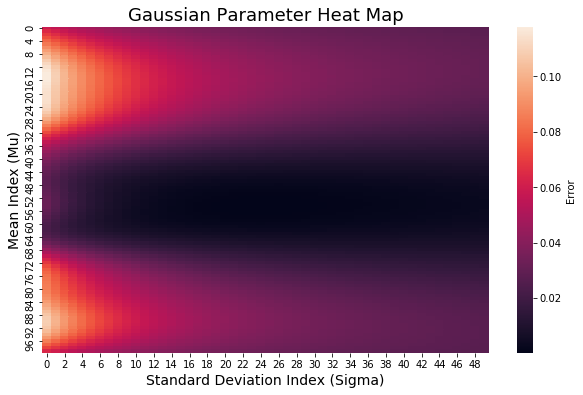

In [3]:
# Create array of parameters
np_mu = np.linspace(0, 10, num=100)
np_sigma = np.linspace(0.5, 2, num=50)
np_xy = np.array(np.meshgrid(np_mu,np_sigma)).T.reshape(-1,2)

# Evaluate model at different parameter values
l_error = []
for row in np_xy:
    l_error.append(gauss.cost(row))
np_error = np.array(l_error)

# Plot parameter heatmap
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Gaussian Parameter Heat Map', fontsize = 18)
points_heat = np_error.reshape(100,50) # reshape error to fit into heatmap
sb.heatmap(points_heat, ax=ax, cbar_kws={'label': 'Error'})

plt.xlabel('Standard Deviation Index (Sigma)', fontsize = 14)
plt.ylabel('Mean Index (Mu)', fontsize = 14)

Text(0, 0.5, 'Response')

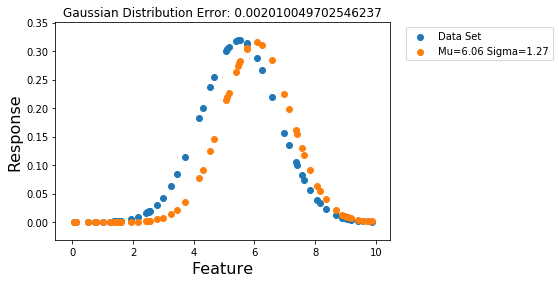

In [4]:
# Visually inspect heatmap for low error parameters
# Predict values
np_params = np.array([np_mu[60], np_sigma[25]])
np_pred = gauss.predict(np_feature, np_params)

# Calculate model error
error_p = gauss.cost(np_params)

# Plot the gaussdist data
plt.title("Gaussian Distribution Error: " + str(error_p))
plt.scatter(np_feature, np_response, label="Data Set")
plt.scatter(np_feature, np_pred, label="Mu=6.06 Sigma=1.27")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel("Feature", fontsize=16)
plt.ylabel("Response", fontsize=16)

### Experiment 2: Refined Grid Search - Gaussian Distribution
#### Grid Search - Refinement Pass

Text(69.0, 0.5, 'Mean Index (Mu)')

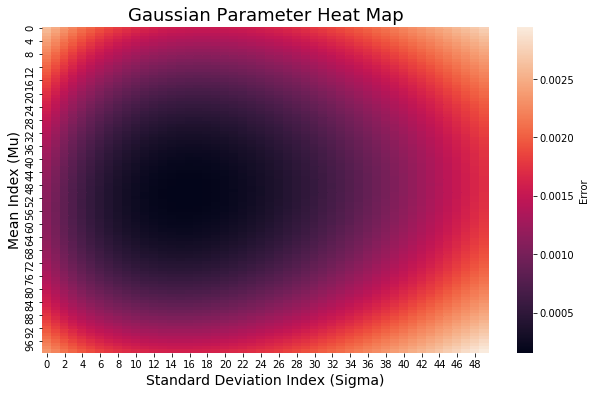

In [5]:
# Create array of parameters
np_mu = np.linspace(5, 6, num=100)
np_sigma = np.linspace(1, 1.75, num=50)
np_xy = np.array(np.meshgrid(np_mu,np_sigma)).T.reshape(-1,2) 

# Evaluate model at different parameter values
l_error = []
for row in np_xy:
    l_error.append(gauss.cost(row))
np_error = np.array(l_error)

# Plot parameter heatmap
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Gaussian Parameter Heat Map', fontsize = 18)
points_heat = np_error.reshape(100,50) # reshape error to fit into heatmap
sb.heatmap(points_heat, ax=ax, cbar_kws={'label': 'Error'})

plt.xlabel('Standard Deviation Index (Sigma)', fontsize = 14)
plt.ylabel('Mean Index (Mu)', fontsize = 14)

Text(0, 0.5, 'Response')

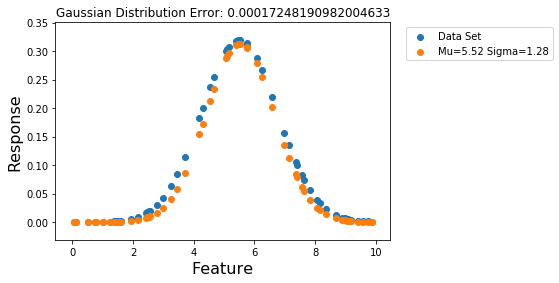

In [6]:
# Visually inspect heatmap for low error parameters
# Predict values
np_params = np.array([np_mu[52], np_sigma[18]])
np_pred = gauss.predict(np_feature, np_params)

# Calculate model error
error_p = gauss.cost(np_params)

# Plot the gaussdist data
plt.title("Gaussian Distribution Error: " + str(error_p))
plt.scatter(np_feature, np_response, label="Data Set")
plt.scatter(np_feature, np_pred, label="Mu=5.52 Sigma=1.28")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel("Feature", fontsize=16)
plt.ylabel("Response", fontsize=16)

Text(0, 0.5, 'Response')

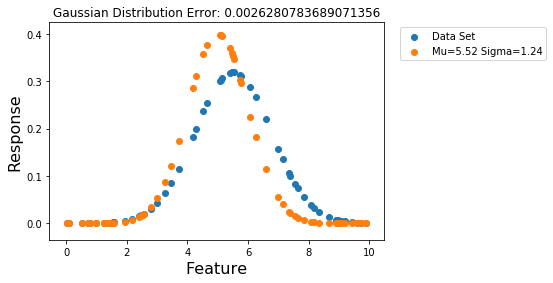

In [7]:
# Use argmin to find the parameter with the lowest error
np_params = np_xy[np.argmin(error_p)]

# Predict values
np_pred = gauss.predict(np_feature, np_params)

# Calculate model error
error_p = gauss.cost(np_params)

# Plot the gaussdist data
plt.title("Gaussian Distribution Error: " + str(error_p))
plt.scatter(np_feature, np_response, label="Data Set")
plt.scatter(np_feature, np_pred, label="Mu=5.52 Sigma=1.24")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel("Feature", fontsize=16)
plt.ylabel("Response", fontsize=16)

### Experiment 3: "Blind" Grid Search - Multivariate Linear Model
#### Grid Search - Refinement Pass

Text(0, 0.5, 'Response')

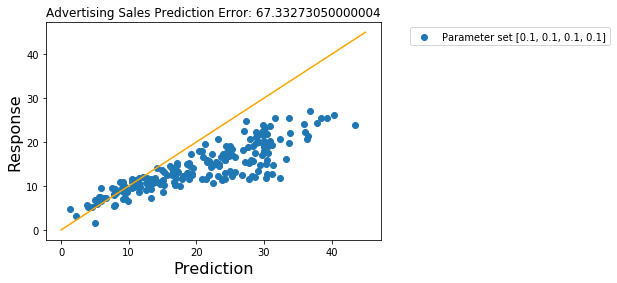

In [8]:
# Load the advertising.csv
np_feature = np.loadtxt(open('advertising.csv', "rb"), skiprows=1, delimiter=",", usecols=range(2,5))
np_response = np.loadtxt(open('advertising.csv', "rb"), skiprows=1, delimiter=",", usecols=range(5,6))

# Predict values
linear = LinearCostFunction(np_feature, np_response)
np_params = np.array([0.1, 0.1, 0.1, 0.1])
np_pred = linear.predict(np_feature, np_params)

# Calculate model error
error_p = linear.cost(np_params)

# Used for line of identity
x = np.linspace(0, 45, 100)

# Plot the sales prediction and response
plt.title("Advertising Sales Prediction Error: " + str(error_p))
plt.scatter(np_pred, np_response, label="Parameter set [0.1, 0.1, 0.1, 0.1]")
plt.plot(x,x, color="orange")
plt.legend(loc="upper right", bbox_to_anchor=(1.7, 1))
plt.xlabel("Prediction", fontsize=16)
plt.ylabel("Response", fontsize=16)

Text(0, 0.5, 'Response')

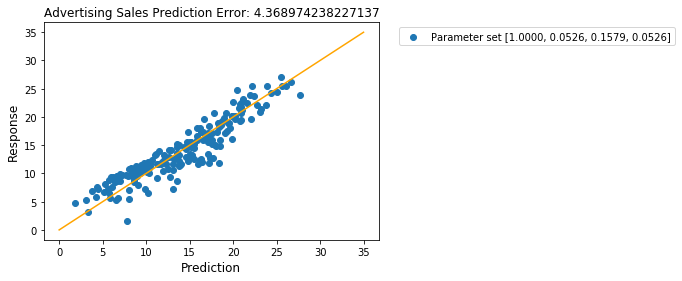

In [11]:
# Create array of parameters
np_b = np.linspace(-1, 1, num=20)
np_xy = np.array(np.meshgrid(np_b, np_b, np_b, np_b)).T.reshape(-1,4)

# Evaluate model at different parameter values
l_error = [] 
for row in np_xy:
    l_error.append(linear.cost(row))
np_error = np.array(l_error)

# Use argmin to find the parameter with the lowest error
np_params = np_xy[np.argmin(np_error)]

# Predict values
np_pred = linear.predict(np_feature, np_params)

# Calculate model error
error_p = linear.cost(np_params)

# Used for line of identity
x = np.linspace(0, 35, 10)

# Plot the data
plt.title("Advertising Sales Prediction Error: " + str(error_p))
plt.scatter(np_pred, np_response, label="Parameter set [1.0000, 0.0526, 0.1579, 0.0526]")
plt.plot(x,x, color="orange")
plt.legend(loc="upper right", bbox_to_anchor=(1.9, 1))
plt.xlabel("Prediction", fontsize=12)
plt.ylabel("Response", fontsize=12)

In [13]:
np_pred.shape

(200,)

In [30]:
np_pred[6]

10.442105263157892

In [29]:
np_response[6]

11.8

Text(0, 0.5, 'Response')

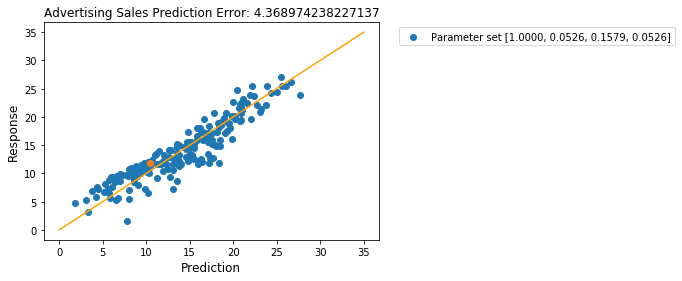

In [31]:
plt.title("Advertising Sales Prediction Error: " + str(error_p))
plt.scatter(np_pred, np_response, label="Parameter set [1.0000, 0.0526, 0.1579, 0.0526]")
plt.scatter(np_pred[6], np_response[6])
plt.plot(x,x, color="orange")
plt.legend(loc="upper right", bbox_to_anchor=(1.9, 1))
plt.xlabel("Prediction", fontsize=12)
plt.ylabel("Response", fontsize=12)